# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
# %matplotlib inline

from IPython.core.pylabtools import figsize
figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
df = dataframe

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [5]:
def q1():
    res = df['normal'].quantile([0.25,0.5,0.75]) - df['binomial'].quantile([0.25,0.5,0.75])
    return tuple([round(val, 3) for val in res])


Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [6]:
def q2():
    low = df['normal'].mean() - df['normal'].std()
    high = df['normal'].mean() + df['normal'].std()

    high = sct.norm.cdf(x=high, loc=20, scale=4)
    low =  sct.norm.cdf(x=low, loc=20, scale=4)

    res = round(high-low, 3)
    return res

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [7]:
def q3():
    m_norm = df['normal'].mean()
    m_binom = df['binomial'].mean()
    v_norm = df['normal'].var()
    v_binom = df['binomial'].var()
    res = [m_binom - m_norm, v_binom - v_norm]
    return tuple([round(item, 3) for item in res])

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [8]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

In [9]:
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


## Inicie sua análise da parte 2 a partir daqui

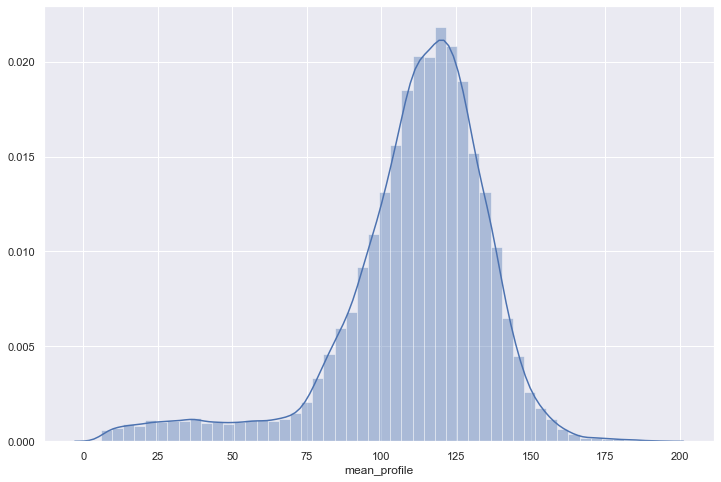

In [10]:
sns.distplot(stars['mean_profile'])

In [11]:
stars['mean_profile'].describe()

count    17897.000000
mean       111.078321
std         25.652705
min          5.812500
25%        100.929688
50%        115.078125
75%        127.085938
max        192.617188
Name: mean_profile, dtype: float64

In [12]:
stars_mean_profile_false = stars.query('target == 0')

# false_pulsar_mean_profile_standardized = sct.zscore(stars_mean_profile_false[['mean_profile']])
# print(false_pulsar_mean_profile_standardized.mean())
false_pulsar_mean_profile_standardized = ((stars_mean_profile_false - stars_mean_profile_false.mean()) / stars_mean_profile_false.std())['mean_profile']
print(false_pulsar_mean_profile_standardized.mean())

2.30758127987042e-16


In [13]:
## quartis teóricos
i1, i2, i3 = sct.norm.ppf([0.8, 0.9, 0.95])
print(i1, i2, i3)
## quartis reais
r1, r2, r3 = ECDF(false_pulsar_mean_profile_standardized)([i1, i2, i3])
print(r1, r2, r3)
res = (round(r1, 3), round(r2, 3), round(r3, 3))
res

0.8416212335729143 1.2815515655446004 1.6448536269514722
0.8055726411612745 0.9105671054250215 0.9587895190060278


(0.806, 0.911, 0.959)

In [14]:
q1_r, q2_r, q3_r = false_pulsar_mean_profile_standardized.quantile([0.25, 0.5, 0.75])
print(q1, q2, q3)

q1_n, q2_n, q3_n = sct.norm.ppf([.25, .5, .75], loc=0, scale=1)
print(q1_n, q2_n, q3_n)

res = tuple([round(val, 3) for val in [q1_r - q1_n, q2_r - q2_n, q3_r - q3_n]])
res

<function q1 at 0x000001DA9078A798> <function q2 at 0x000001DA9078AC18> <function q3 at 0x000001DA907AD0D8>
-0.6744897501960817 0.0 0.6744897501960817


(0.027, 0.04, -0.004)

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [15]:
def q4():
    ## quartis teóricos
    i1, i2, i3 = sct.norm.ppf([0.8, 0.9, 0.95])
    ## quartis reais
    r1, r2, r3 = ECDF(false_pulsar_mean_profile_standardized)([i1, i2, i3])
    res = (round(r1, 3), round(r2, 3), round(r3, 3))
    return res

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [16]:
def q5():
    q1_r, q2_r, q3_r = false_pulsar_mean_profile_standardized.quantile([0.25, 0.5, 0.75])
    q1_n, q2_n, q3_n = sct.norm.ppf([.25, .5, .75], loc=0, scale=1)
    res = tuple([round(val, 3) for val in [q1_r - q1_n, q2_r - q2_n, q3_r - q3_n]])
    return res

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.